# Imports:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameter:

In [2]:
Jn_name = 'Realized Efficiency'

In [3]:
make_greyscale = True

In [4]:
if make_greyscale:
    high_contrast_greys = ['#000000', '#808080', '#C0C0C0']
    sns.set_palette(high_contrast_greys)
    savefile_suffix = '_greyscale'
else:
    sns.set_palette('deep')
    savefile_suffix = ''

# Plot Densities when Scheme is Biased in Y:

In [5]:
fitted_FI_and_corr = pd.read_pickle('sample_by_y_bias.pkl')

In [6]:
fitted_FI_and_corr.describe()

,srs_fi,biased_fi,srs_corr,biased_corr
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,858.641428,843.940512,-0.000003,-0.003821
std,23.947606,27.302935,0.003165,0.003092
min,750.120000,735.557441,-0.014226,-0.016726
25%,842.452750,825.411701,-0.002143,-0.005908
50%,858.602500,843.833100,0.000002,-0.003823
75%,874.838000,862.445649,0.002141,-0.001739
max,982.528000,994.464286,0.014403,0.008751


### DDC:

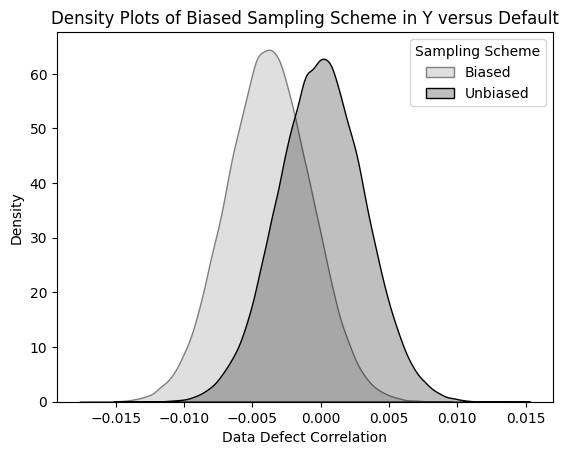

In [7]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_corr', 'biased_corr']], fill = True)
plt.xlabel('Data Defect Correlation')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in Y versus Default')
plt.savefig(f'ddc_densities_y_bias{savefile_suffix}.png', bbox_inches = 'tight')

### FI:

In [8]:
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Access the first two colors in the color cycle
c1 = color_cycle[0]  # 'tab:blue'
c2 = color_cycle[1]  # 'tab:orange'

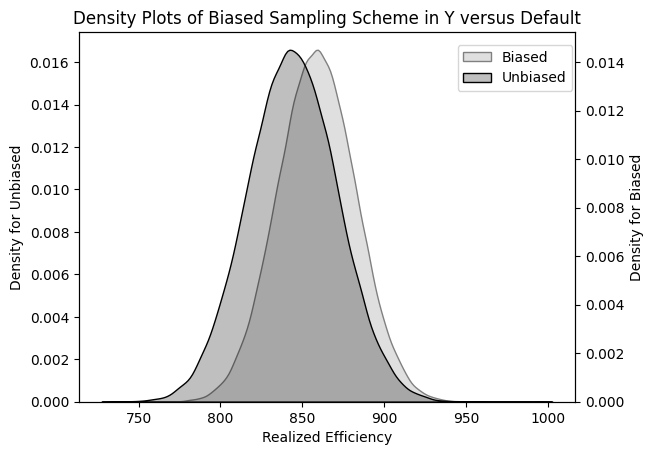

In [9]:
fig, ax1 = plt.subplots()

sns.kdeplot(data=fitted_FI_and_corr['srs_fi'], ax=ax1, color=c2, fill=True, label='Unbiased')
ax1.set_ylabel('Density for Unbiased')
ax1.tick_params(axis='y')
ax1.set_xlabel(f'{Jn_name}')

ax2 = ax1.twinx()
sns.kdeplot(data=fitted_FI_and_corr['biased_fi'], ax=ax2, color=c1, fill=True, label='Biased')
ax2.set_ylabel('Density for Biased')
ax2.tick_params(axis='y')

fig.legend(labels = ['Biased', 'Unbiased'], loc = (0.7, 0.8))

plt.title('Density Plots of Biased Sampling Scheme in Y versus Default')
plt.savefig(f'samp_elasticity_densities_y_bias{savefile_suffix}.png', bbox_inches = 'tight')

### Joint:

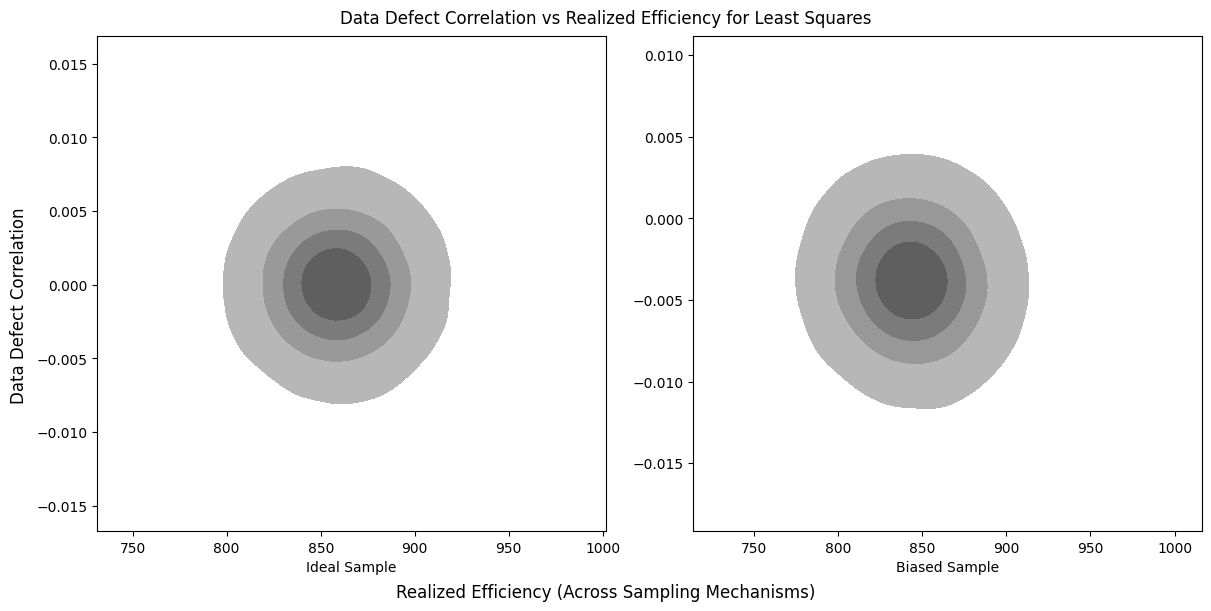

In [10]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

ax = axes[0]
sns.kdeplot(
    data=fitted_FI_and_corr,
    x=f"srs_fi",
    y=f"srs_corr",
    fill=True,
    bw_adjust=1.8,
    levels=5,
    ax=ax,
)
ax.set_xlabel("Ideal Sample")
ax.set_ylabel("")

ax = axes[1]
sns.kdeplot(
    data=fitted_FI_and_corr,
    x=f"biased_fi",
    y=f"biased_corr",
    fill=True,
    bw_adjust=1.8,
    levels=5,
    ax=ax,
)
ax.set_xlabel("Biased Sample")
ax.set_ylabel("")

fig.suptitle(f"Data Defect Correlation vs {Jn_name} for Least Squares")
fig.supylabel("Data Defect Correlation")
fig.supxlabel(f"{Jn_name} (Across Sampling Mechanisms)")
plt.savefig(f"joint_density_y_bias{savefile_suffix}.png", bbox_inches="tight")

# Plot Densities when Scheme is Biased in X:

In [23]:
fitted_FI_and_corr = pd.read_pickle('sample_by_x_bias.pkl')

In [24]:
fitted_FI_and_corr.describe()

,srs_fi,biased_fi,srs_corr,biased_corr
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,858.641428,1446.768983,-0.000003,-0.000102
std,23.947606,24.904229,0.003165,0.004106
min,750.120000,1342.132692,-0.014226,-0.017120
25%,842.452750,1429.969134,-0.002143,-0.002863
50%,858.602500,1446.743278,0.000002,-0.000093
75%,874.838000,1463.503612,0.002141,0.002667
max,982.528000,1552.019194,0.014403,0.017901


In [13]:
fitted_FI_and_corr.describe()

,srs_fi,biased_fi,srs_corr,biased_corr
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,858.641428,1446.768983,-0.000003,-0.000102
std,23.947606,24.904229,0.003165,0.004106
min,750.120000,1342.132692,-0.014226,-0.017120
25%,842.452750,1429.969134,-0.002143,-0.002863
50%,858.602500,1446.743278,0.000002,-0.000093
75%,874.838000,1463.503612,0.002141,0.002667
max,982.528000,1552.019194,0.014403,0.017901


### DDC:

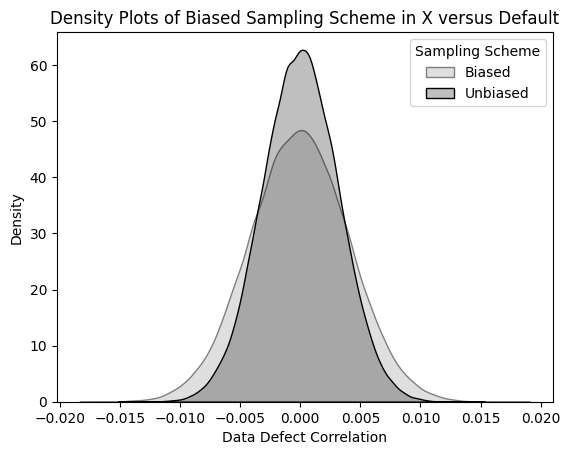

In [14]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_corr', 'biased_corr']], fill = True)
plt.xlabel('Data Defect Correlation')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in X versus Default')
plt.savefig(f'ddc_densities_x_bias{savefile_suffix}.png', bbox_inches = 'tight')

### Elasticity:

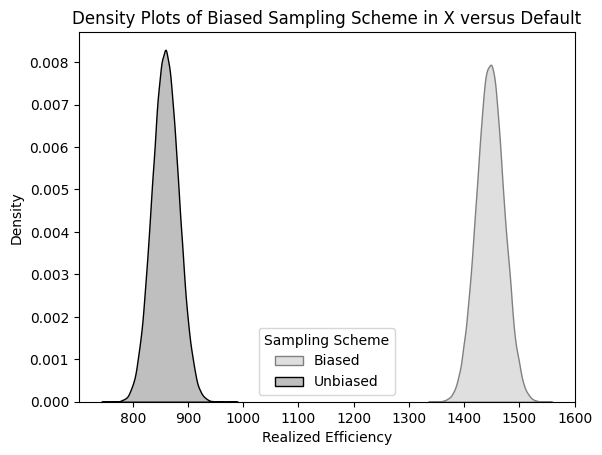

In [15]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_fi', 'biased_fi']], fill=True)
plt.xlabel(f'{Jn_name}')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in X versus Default') 
plt.savefig(f'samp_elasticity_densities_x_bias{savefile_suffix}.png', bbox_inches = 'tight')

### Joint:

In [25]:
fitted_FI_and_corr.corr()

,srs_fi,biased_fi,srs_corr,biased_corr
srs_fi,1.000000,0.555726,0.001127,0.003419
biased_fi,0.555726,1.000000,-0.003619,-0.001995
srs_corr,0.001127,-0.003619,1.000000,0.943055
biased_corr,0.003419,-0.001995,0.943055,1.000000


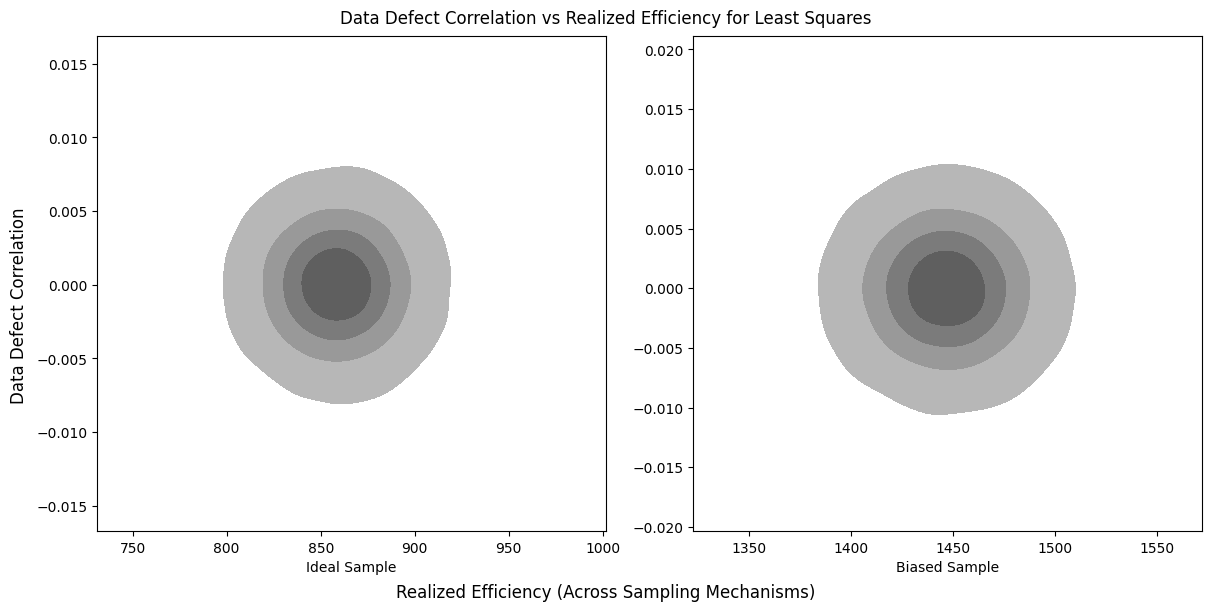

In [16]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

ax = axes[0]
sns.kdeplot(
    data=fitted_FI_and_corr,
    x=f"srs_fi",
    y=f"srs_corr",
    fill=True,
    bw_adjust=1.8,
    levels=5,
    ax=ax,
)
ax.set_xlabel("Ideal Sample")
ax.set_ylabel("")

ax = axes[1]
sns.kdeplot(
    data=fitted_FI_and_corr,
    x=f"biased_fi",
    y=f"biased_corr",
    fill=True,
    bw_adjust=1.8,
    levels=5,
    ax=ax,
)
ax.set_xlabel("Biased Sample")
ax.set_ylabel("")

fig.suptitle(f"Data Defect Correlation vs {Jn_name} for Least Squares")
fig.supylabel("Data Defect Correlation")
fig.supxlabel(f"{Jn_name} (Across Sampling Mechanisms)")
plt.savefig(f"joint_density_x_bias{savefile_suffix}.png", bbox_inches="tight")

# Plot Densities when Scheme is Biased in Abs Y:

In [29]:
fitted_FI_and_corr = pd.read_pickle('sample_by_abs_y_bias.pkl')

In [30]:
fitted_FI_and_corr.describe()

,srs_fi,biased_fi,srs_corr,biased_corr
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,858.641428,1069.482471,-0.000003,0.038741
std,23.947606,35.691209,0.003165,0.003115
min,750.120000,904.186296,-0.014226,0.025078
25%,842.452750,1045.245314,-0.002143,0.036656
50%,858.602500,1069.359590,0.000002,0.038755
75%,874.838000,1093.588246,0.002141,0.040846
max,982.528000,1232.791322,0.014403,0.052924


In [31]:
fitted_FI_and_corr.corr()

,srs_fi,biased_fi,srs_corr,biased_corr
srs_fi,1.000000,0.725042,0.001127,0.202122
biased_fi,0.725042,1.000000,0.139577,0.203984
srs_corr,0.001127,0.139577,1.000000,0.769759
biased_corr,0.202122,0.203984,0.769759,1.000000


### DDC:

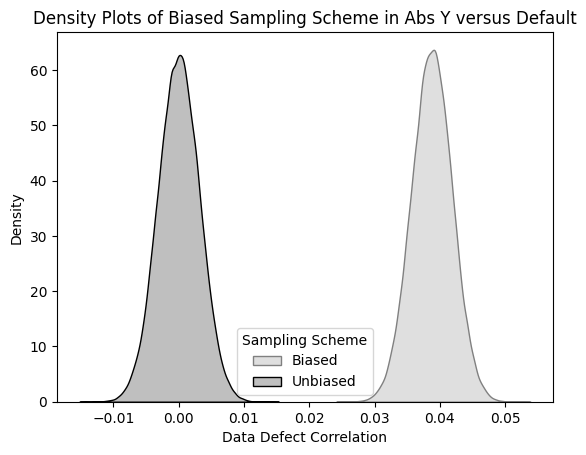

In [32]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_corr', 'biased_corr']], fill = True)
plt.xlabel('Data Defect Correlation')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in Abs Y versus Default')
plt.savefig(f'ddc_densities_abs_y_bias{savefile_suffix}.png', bbox_inches = 'tight')

### Elasticity:

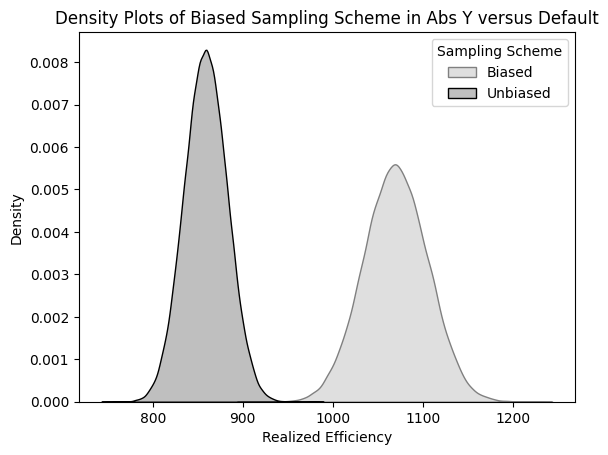

In [33]:
fig = sns.kdeplot(fitted_FI_and_corr[['srs_fi', 'biased_fi']], fill=True)
plt.xlabel(f'{Jn_name}')
plt.ylabel('Density')
plt.legend(title="Sampling Scheme", labels=["Biased", "Unbiased"])
plt.title('Density Plots of Biased Sampling Scheme in Abs Y versus Default') 
plt.savefig(f'samp_elasticity_densities_abs_y_bias{savefile_suffix}.png', bbox_inches = 'tight')

### Joint:

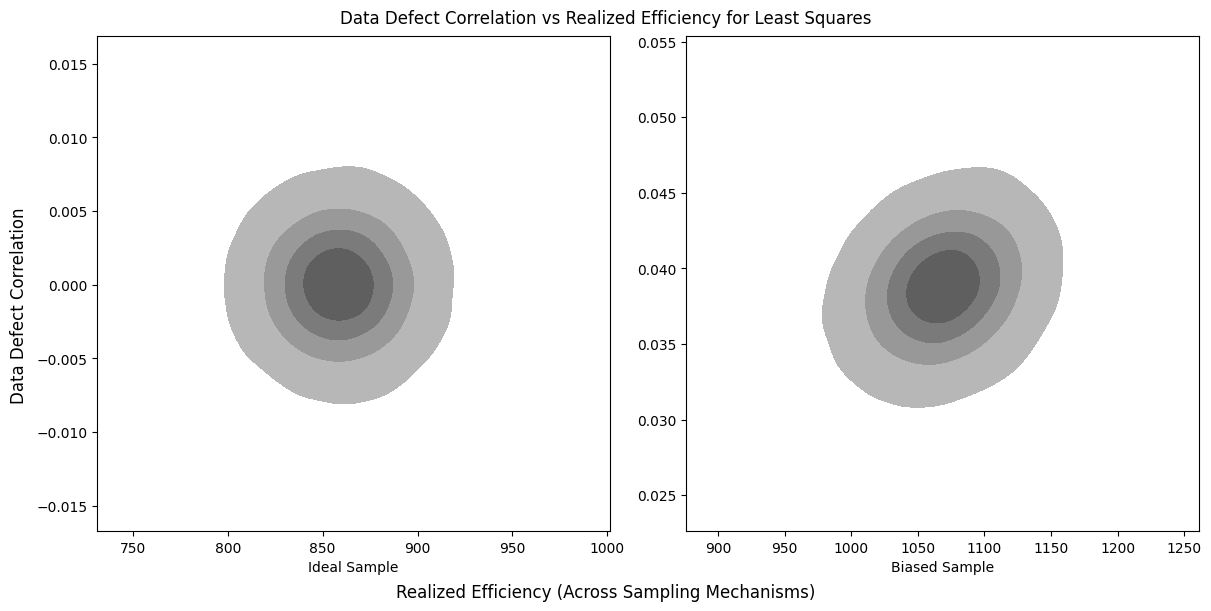

In [34]:
fig, axes = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 6))

ax = axes[0]
sns.kdeplot(
    data=fitted_FI_and_corr,
    x=f"srs_fi",
    y=f"srs_corr",
    fill=True,
    bw_adjust=1.8,
    levels=5,
    ax=ax,
)
ax.set_xlabel("Ideal Sample")
ax.set_ylabel("")

ax = axes[1]
sns.kdeplot(
    data=fitted_FI_and_corr,
    x=f"biased_fi",
    y=f"biased_corr",
    fill=True,
    bw_adjust=1.8,
    levels=5,
    ax=ax,
)
ax.set_xlabel("Biased Sample")
ax.set_ylabel("")

fig.suptitle(f"Data Defect Correlation vs {Jn_name} for Least Squares")
fig.supylabel("Data Defect Correlation")
fig.supxlabel(f"{Jn_name} (Across Sampling Mechanisms)")
plt.savefig(f"joint_density_abs_y_bias{savefile_suffix}.png", bbox_inches="tight")